# Model Development - CNN

This notebook will represent model development for a convolutional neural network that can accurately classify digits.

In [1]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Getting the Data

In [2]:
PATH = '/Users/jinalshah/Jinal/Github Repos/Digit-Classifier/Data'
full_train = pd.read_csv(PATH+'/train.csv')
full_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploring the Data

Label: 3


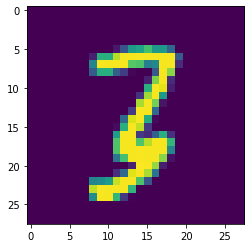

In [3]:
# Plotting an image
plt.imshow(full_train.loc[775][1:].values.reshape((28,28)))
print(f'Label: {full_train.loc[775,"label"]}')
plt.show()

In [4]:
# Describing the data
full_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Preprocessing

In [5]:
# Splitting the data up into training, testing, and validation
remain, testing = train_test_split(full_train, test_size=0.1,random_state=0, shuffle=True)
training, validation = train_test_split(remain, test_size=0.2, random_state=0, shuffle=True)

In [6]:
# Checking the Shapes:
print(f'Training: {training.shape}')
print(f'Validation: {validation.shape}')
print(f'Testing: {testing.shape}')

Training: (30240, 785)
Validation: (7560, 785)
Testing: (4200, 785)


In [7]:
# Scaling each dataset to be between 0 & 1 by dividing by 255. 
# Done so that the CNN can train faster because numbers are nicer
# Pixel values are between 0 & 255
train_labels = torch.from_numpy(training['label'].values)
training.drop('label',axis=1,inplace=True)
training /= 255.0
training = torch.from_numpy(training.values)

valid_labels = torch.from_numpy(validation['label'].values)
validation.drop('label',axis=1,inplace=True)
validation /= 255.0
validation = torch.from_numpy(validation.values)

test_labels = torch.from_numpy(testing['label'].values)
testing.drop('label',axis=1,inplace=True)
testing /= 255.0
testing = torch.from_numpy(testing.values)

Label: 0    1
Name: 0, dtype: int64


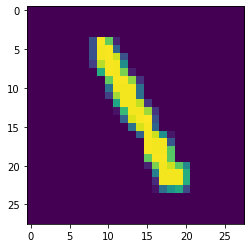

In [8]:
# Checking the transformation
plt.imshow(pd.DataFrame(training.numpy()).loc[0].values.reshape((28,28)))
print(f'Label: {pd.DataFrame(train_labels.numpy()).loc[0]}')
plt.show()

In [9]:
# During the data into PyTorch datasets
# This makes it easier for PyTorch to iterate over
train_labels = torch.utils.data.TensorDataset(train_labels)
training = torch.utils.data.TensorDataset(training)
full_training = torch.utils.data.ConcatDataset((training, train_labels))

valid_labels = torch.utils.data.TensorDataset(valid_labels)
validation = torch.utils.data.TensorDataset(validation)
full_validation = torch.utils.data.ConcatDataset((validation, valid_labels))

test_labels = torch.utils.data.TensorDataset(test_labels)
testing = torch.utils.data.TensorDataset(testing)
full_testing = torch.utils.data.ConcatDataset((testing, test_labels))

In [10]:
# Putting the data into dataloaders for batch training
train_loader = torch.utils.data.DataLoader(full_training, batch_size=90)
valid_loader = torch.utils.data.DataLoader(full_validation, batch_size=70)
test_loader = torch.utils.data.DataLoader(full_testing, batch_size=70)